# Analysis of Electoral Performance in Municipal Elections in the Metropolitan Region of Recife between 2008 and 2020

## Electoral Perfil

## Environment Settings

In [57]:
# Imports
import pandas as pd;
import matplotlib.pyplot as plt;

In [58]:
# Config PySpark
import os
import sys
from pyspark.sql import SparkSession

os.environ['PYSPARK_PYTHON'] = sys.executable
os.environ['PYSPARK_DRIVER_PYTHON'] = sys.executable
spark = SparkSession.builder.getOrCreate()

In [59]:
# Creating a SparkSession
spark = SparkSession.builder.appName("LoadElectionData").getOrCreate();

## Datasets

In [60]:
df_perfil_08 = spark.read.csv('../datasets/perfil_eleitor_secao_2008_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);
df_perfil_16 = spark.read.csv('../datasets/perfil_eleitor_secao_2016_PE.csv', encoding='latin1', sep=';', header=True, inferSchema=True);

In [ ]:
df_perfil_08.show(5)

In [61]:
df_perfil_16.show(5)

+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+--------------------+--------------------+--------------------+-------------------+----------------------+------------------------+--------------------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|SG_UF|CD_MUNICIPIO|NM_MUNICIPIO|CD_MUN_SIT_BIOMETRICA|DS_MUN_SIT_BIOMETRICA|NR_ZONA|NR_SECAO|NR_LOCAL_VOTACAO|CD_GENERO|DS_GENERO|CD_ESTADO_CIVIL|DS_ESTADO_CIVIL|CD_FAIXA_ETARIA|     DS_FAIXA_ETARIA|CD_GRAU_ESCOLARIDADE|DS_GRAU_ESCOLARIDADE|QT_ELEITORES_PERFIL|QT_ELEITORES_BIOMETRIA|QT_ELEITORES_DEFICIENCIA|QT_ELEITORES_INC_NM_SOCIAL|
+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+----------------

In [65]:
# Região Metropolitana
rmr = ['ABREU E LIMA', 'ARAÇOIABA', 'CABO DE SANTO AGOSTINHO', 'CAMARAGIBE', 'IGARASSU',
 'ILHA DE ITAMARACÁ', 'IPOJUCA', 'ITAPISSUMA', 'JABOATÃO DOS GUARARAPES', 'MORENO',
 'OLINDA', 'PAULISTA', 'RECIFE', 'SÃO LOURENÇO DA MATA'];

## Questions

In [66]:
df_rmr_08 = df_perfil_08.filter(df_perfil_08["NM_MUNICIPIO"].isin(rmr))
df_rmr_16 = df_perfil_16.filter(df_perfil_16["NM_MUNICIPIO"].isin(rmr))

In [67]:
df_rmr_16.show(3)

+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+--------------------+--------------------+--------------------+-------------------+----------------------+------------------------+--------------------------+
|DT_GERACAO|         HH_GERACAO|ANO_ELEICAO|SG_UF|CD_MUNICIPIO|NM_MUNICIPIO|CD_MUN_SIT_BIOMETRICA|DS_MUN_SIT_BIOMETRICA|NR_ZONA|NR_SECAO|NR_LOCAL_VOTACAO|CD_GENERO|DS_GENERO|CD_ESTADO_CIVIL|DS_ESTADO_CIVIL|CD_FAIXA_ETARIA|     DS_FAIXA_ETARIA|CD_GRAU_ESCOLARIDADE|DS_GRAU_ESCOLARIDADE|QT_ELEITORES_PERFIL|QT_ELEITORES_BIOMETRIA|QT_ELEITORES_DEFICIENCIA|QT_ELEITORES_INC_NM_SOCIAL|
+----------+-------------------+-----------+-----+------------+------------+---------------------+---------------------+-------+--------+----------------+---------+---------+---------------+---------------+---------------+----------------

In [68]:
from pyspark.sql.functions import col, sum as _sum;

### Perfil Etário

In [69]:
df_grouped_perfil_08 = df_rmr_08.groupBy("DS_FAIXA_ETARIA").sum("QT_ELEITORES_PERFIL");
df_grouped_perfil_16 = df_rmr_16.groupBy("DS_FAIXA_ETARIA").sum("QT_ELEITORES_PERFIL");

In [70]:
datasets = [
    df_grouped_perfil_08,
    df_grouped_perfil_16
]

In [71]:
# Show the aggregated DataFrame
df_grouped_perfil_16.show(df_grouped_perfil_16.count());

+--------------------+------------------------+
|     DS_FAIXA_ETARIA|sum(QT_ELEITORES_PERFIL)|
+--------------------+------------------------+
|16 anos          ...|                    9710|
|70 a 74 anos     ...|                   66471|
|20 anos          ...|                   57120|
|95 a 99 anos     ...|                    1267|
|18 anos          ...|                   43958|
|60 a 64 anos     ...|                  153485|
|Inválido         ...|                     134|
|25 a 29 anos     ...|                  292487|
|75 a 79 anos     ...|                   37307|
|50 a 54 anos     ...|                  234103|
|40 a 44 anos     ...|                  278466|
|21 a 24 anos     ...|                  230860|
|35 a 39 anos     ...|                  304164|
|100 anos ou mais ...|                     339|
|90 a 94 anos     ...|                    6234|
|17 anos          ...|                   23554|
|65 a 69 anos     ...|                  115462|
|45 a 49 anos     ...|                  

In [72]:
order_DS_FAIXA_ETARIA = {
    "16 anos": 0,
    "17 anos": 1,
    "18 anos": 2,
    "19 anos": 3,
    "20 anos": 4,
    "21 a 24 anos": 5,
    "25 a 29 anos": 6,
    "30 a 34 anos": 7,
    "35 a 39 anos": 8,
    "40 a 44 anos": 9,
    "45 a 49 anos": 10,
    "50 a 54 anos": 11,
    "55 a 59 anos": 12,
    "60 a 64 anos": 13,
    "65 a 69 anos": 14,
    "70 a 74 anos": 15,
    "75 a 79 anos": 16,
    "80 a 84 anos": 17,
    "85 a 89 anos": 18,
    "90 a 94 anos": 19,
    "95 a 99 anos": 20,
    "100 anos ou mais": 21,
    "Inválido": 22
};

In [73]:
def limpar_faixa_etaria(valor):
    for chave in order_DS_FAIXA_ETARIA.keys():
        if chave in valor:
            return chave;
    return 'Não encontrado';  # Retorna este valor para identificar se algum valor não foi encontrado

i = 0;

for df in datasets:
    df_pd_perfil = df.toPandas();

    df_pd_perfil['DS_FAIXA_ETARIA'] = df_pd_perfil['DS_FAIXA_ETARIA'].apply(limpar_faixa_etaria);

    # Criar uma nova coluna 'categoria_idade' baseada nos valores do dicionário
    df_pd_perfil['categoria_idade'] = df_pd_perfil['DS_FAIXA_ETARIA'].apply(lambda x: order_DS_FAIXA_ETARIA.get(x, -1));

    df_pd_perfil.set_index('categoria_idade', inplace=True);
    df_pd_perfil.sort_index(inplace=True);

    df_pd_perfil = df_pd_perfil[::-1]
    
    datasets[i] = df_pd_perfil;
    i += 1;

In [80]:
print(datasets[1])

                  DS_FAIXA_ETARIA  sum(QT_ELEITORES_PERFIL)  Porcentagem
categoria_idade                                                         
22                       Inválido                       134     0.004976
21               100 anos ou mais                       339     0.012589
20                   95 a 99 anos                      1267     0.047051
19                   90 a 94 anos                      6234     0.231502
18                   85 a 89 anos                     10654     0.395641
17                   80 a 84 anos                     18396     0.683144
16                   75 a 79 anos                     37307     1.385413
15                   70 a 74 anos                     66471     2.468431
14                   65 a 69 anos                    115462     4.287734
13                   60 a 64 anos                    153485     5.699736
12                   55 a 59 anos                    193403     7.182109
11                   50 a 54 anos                  

In [79]:
for df in datasets:
    # Calcular o total da coluna 'sum(QT_ELEITORES_PERFIL)'
    total = df['sum(QT_ELEITORES_PERFIL)'].sum()

    # Calcular a porcentagem e adicionar como uma nova coluna
    df['Porcentagem'] = (df['sum(QT_ELEITORES_PERFIL)'] / total) * 100

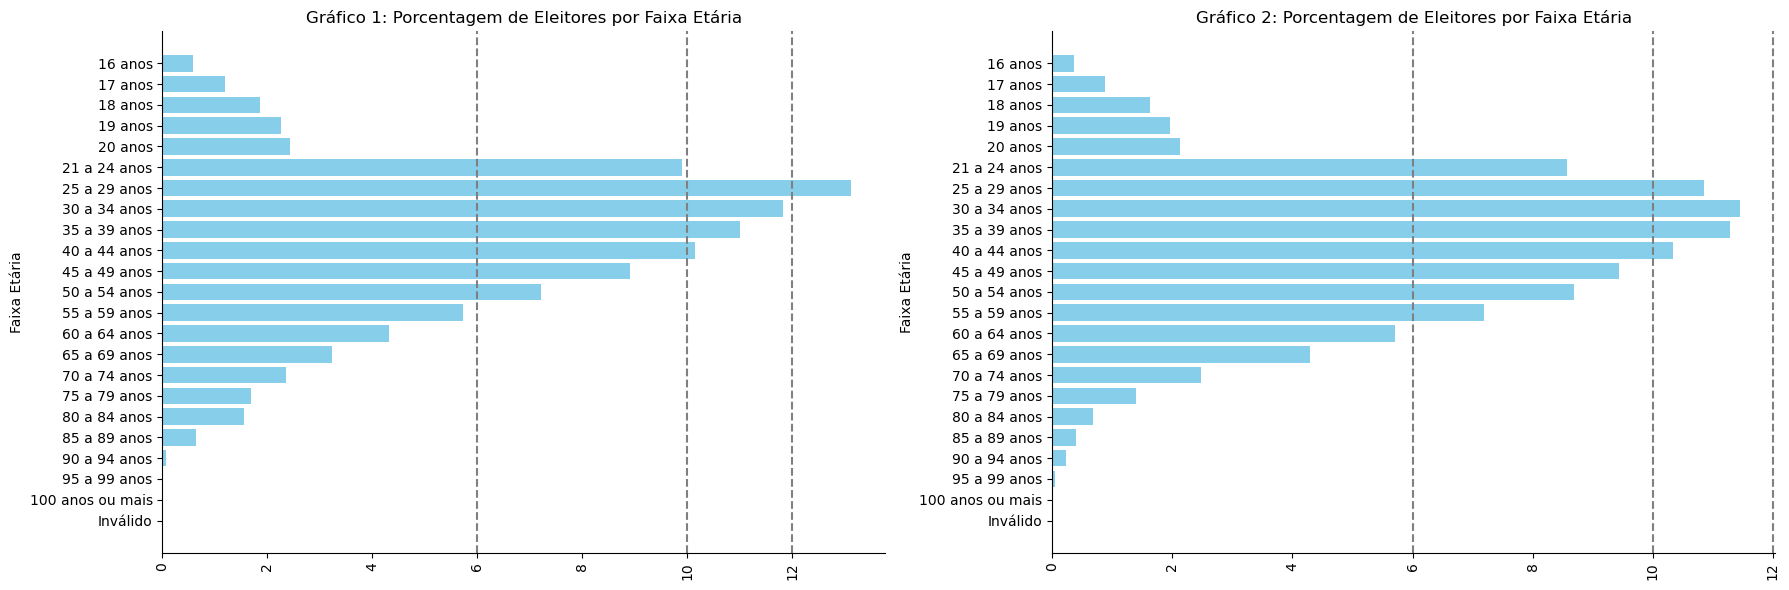

In [83]:
plt.figure(figsize=(18, 6))  # Definir o tamanho da figura

for i, df in enumerate(datasets, start=1):
    plt.subplot(1, 2, i)  # Subplot na linha única, coluna i (1 ou 2)
    plt.barh(df['DS_FAIXA_ETARIA'], df['Porcentagem'], color='skyblue')
    plt.ylabel('Faixa Etária')
    plt.title(f'Gráfico {i}: Porcentagem de Eleitores por Faixa Etária')
    plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Adicionar linhas pontilhadas nos pontos 6, 10 e 12 do eixo 'Porcentagem'
    ax.axvline(x=6, color='gray', linestyle='--')
    ax.axvline(x=10, color='gray', linestyle='--')
    ax.axvline(x=12, color='gray', linestyle='--')

plt.tight_layout()
plt.show()

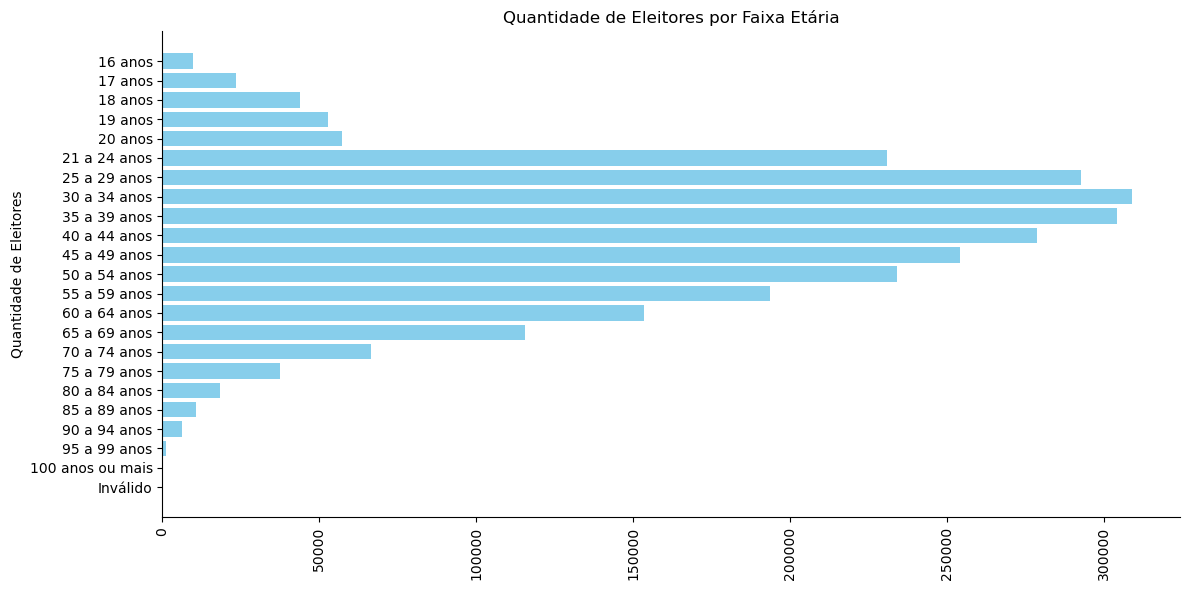

In [78]:
# df_pd_grouped_perfil = df_pd_grouped_perfil[::-1]
df_pro = datasets[1]

plt.figure(figsize=(12, 6))  # Definir o tamanho da figura
plt.barh(df_pro['DS_FAIXA_ETARIA'], df_pro['sum(QT_ELEITORES_PERFIL)'], color='skyblue')
plt.ylabel('Quantidade de Eleitores')
plt.title('Quantidade de Eleitores por Faixa Etária')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()  

In [ ]:
# vereadores mais votados em cada eleição entre 2008 e 2020
# vereadores mais votados entre 2008 e 2020
# distribuição da porcentagem de votos entre municípios da RMR
# desempenho partidário para verdeadores (linhas)
# votação por partido?

### Perfil Grau de Escolaridade

In [ ]:
'DS_GRAU_ESCOLARIDADE'

### Perfil Estado Civil

In [ ]:
'DS_ESTADO_CIVIL'

### Brancos e Nulos entre 2008 e 2020